<h1> K-NN on Credit Card Fraud Detection </h1>

The given dataset tells us  whether any fraud in credit card transactions has occured or not.There are total 30 attributes and 1 output class which tells us whether any fraud is detected. The output is denoted by attribute 'Class' which has two outputs.<br>

Class '0'   = No fraud <br>
Class '1'   = Fraud <br>

### <u> Data Source </u>
The dataset is obtained from the kaggle.com,the link for which is given below.
https://www.kaggle.com/dalpozz/creditcardfraud/data

## <u>Objective</u>

 * Propose a suitable error metrics for  this problem.
 * Apply K-NN on dataset, find out the best K using grid search.
 * Report the value of performance.
 

In [1]:
!pip install seaborn

    100% |################################| 184kB 4.6MB/s eta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/26/0a/44/53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Importing necessary modules

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,f1_score,precision_score,roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.cross_validation import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
cc=pd.read_csv('creditcard.csv')


In [4]:
cc.shape

(284807, 31)

In [5]:
headers=cc.columns
headers

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
C=cc['Class']

In [7]:
F=cc.drop('Class',axis=1)
F.shape

(284807, 30)

## Removal of Outliers from dataset

We have got <b>284K</b> data points with <b>30</b> features.Now we will try to remove the outliers from the data points using Local Outlier factor keeping contamination factor to <b>0.15</b>

In [8]:
df_wo_outlier = LocalOutlierFactor(contamination=0.15,n_jobs=20,n_neighbors=10)
new_df = df_wo_outlier.fit_predict(F)
new_df.shape

(284807,)

In [9]:
new_df

array([-1, -1, -1, ..., -1, -1, -1])

In [10]:
x=pd.DataFrame(new_df)


In [11]:
x[0].value_counts()

 1    242086
-1     42721
Name: 0, dtype: int64

In [12]:
removed_outlier=x[x[0]==1]
z=removed_outlier.index

In [13]:
df_removed_outlier=F.loc[z]
df_removed_outlier.shape

(242086, 30)

The new data-set obtained after removal of outlier is <b> 242K </b>. Not all the outlier are removed from dataset. 

## Standardization of the dataset

In [14]:
standardized_data=StandardScaler().fit_transform(df_removed_outlier)
standardized_data.shape


(242086, 30)

In [15]:
df=pd.DataFrame(standardized_data,columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
df.shape

(242086, 30)

Dropping the time column from the dataset

In [16]:
df=df.drop('Time',axis=1)
df.shape

(242086, 29)

In [17]:
labels=C.loc[z]
labels.shape

(242086,)

## Training and Test data

Splitting the data set into 70%  train and  30% test

In [18]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df, 
                                                             labels,test_size=0.3,
                                                             random_state=0)

In [19]:
neighbors=list(range(1,20,2))
value_k= [{'n_neighbors': neighbors}]

In [20]:
#Using GridSearchCV
model = GridSearchCV(KNeighborsClassifier(n_jobs=20,weights='distance'), value_k, 
                     scoring = None, cv=3 ,n_jobs=20)
model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=20, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=20,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
print(model.best_estimator_)
print(model.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=20, n_neighbors=19, p=2,
           weights='distance')
0.999600693966


In [22]:
print(model.best_params_)

{'n_neighbors': 19}


The GridSearchCV on KNN gave us the accuracy of <b>99.96% </b> with nearest neighbors <b>K=19</b>. 

In [25]:
clf=KNeighborsClassifier(n_neighbors=19,n_jobs=-1,weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
           weights='distance')

In [26]:
Y_pred=clf.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Confusion Matrix

Let's plot the confusion matrix for our model and see what results are obtained.

In binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

In [27]:
tn, fp, fn, tp =confusion_matrix(y_test, Y_pred).ravel()
(tn, fp, fn, tp )

(72568, 5, 24, 29)

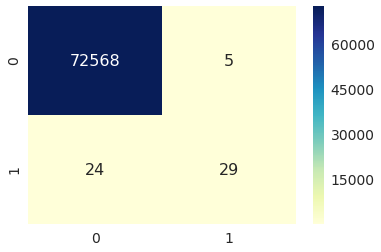

In [28]:
x=confusion_matrix(y_test, Y_pred)
cm_df=pd.DataFrame(x,index=[0,1],columns=[0,1])

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")


In [29]:
def Rates(tn,fp,fn,tp):
    TPR=float(tp/(tp+fn))
    TNR=float(tn/(tn+fp))
    FPR=float(fp/(tn+fp))
    FNR=float(fn/(tp+fn))
    print("True Positive Rate or Sensitivity = %f" %(TPR*100))
    print("True Negative Rate or Specificity = %f" %(TNR*100))
    print("False Positive Rate or Fall-out = %f" %(FPR*100))
    print("False Negative Rate or Missclassification rate = %f" %(FNR*100))
    

In [30]:
Rates(tn,fp,fn,tp)

True Positive Rate or Sensitivity = 54.716981
True Negative Rate or Specificity = 99.993110
False Positive Rate or Fall-out = 0.006890
False Negative Rate or Missclassification rate = 45.283019


In [31]:
precision_score(y_test,Y_pred)

0.8529411764705882

# Conclusion

* The best fit hyper-parameter for KNN using GridSearchCV is <b> 19 </b>
* The accuracy for the model with <b> K=19 </b> is found to be <b> 99.96% </b>
* The confusion matrix for the given model is calculated to find out tn,fp,fn,tp.
* The Sensitivity and the Specificity of the model is <b> 54.71% </b> and <b> 99.99% </b> respecitvely,tells us that the model is able to identify the fraud and the non- fradulent transactions effectively.
* The fall-out rate is <b> 0.006%</b> which is almost equals to zero,so acceptable.
* The Miss-classification rate is found to be <b> 45.28% </b> which is very high.A model with such high FNR is not acceptable.Therefore using KNN model for this problem should be avoided
* The Precision score for the model is found to be <b> 85.28% </b> 